In [1]:
!pip install seaborn scikit-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df = pd.read_csv("Lung Cancer.csv")
print(df.columns)

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived'],
      dtype='object')


In [3]:
display(df.head())

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [4]:
display(df.tail())

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
889995,889996,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,889997,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,889998,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,889999,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0
889999,890000,55.0,Female,Malta,2021-07-26,Stage II,Yes,Current Smoker,42.8,250,0,0,0,0,Combined,2022-10-19,0


In [5]:
df['age'] = df['age'].astype(int)
print(df['age'].dtype)
df.head(5)

int64


,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [6]:
df.tail(5)

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
889995,889996,40,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,889997,62,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,889998,48,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,889999,67,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0
889999,890000,55,Female,Malta,2021-07-26,Stage II,Yes,Current Smoker,42.8,250,0,0,0,0,Combined,2022-10-19,0


In [7]:
df = df.drop(['id', 'country', 'diagnosis_date', 'end_treatment_date'], axis=1)
print(list(df.columns))

['age', 'gender', 'cancer_stage', 'family_history', 'smoking_status', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type', 'survived']


In [8]:
df.head(5)

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
0,64,Male,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,0
1,50,Female,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,1
2,65,Female,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,0
3,51,Female,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,0
4,37,Male,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,0


In [9]:
df.tail(5)

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
889995,40,Male,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,0
889996,62,Female,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,0
889997,48,Female,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,1
889998,67,Female,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,0
889999,55,Female,Stage II,Yes,Current Smoker,42.8,250,0,0,0,0,Combined,0


In [10]:
df.count()

age                  890000
gender               890000
cancer_stage         890000
family_history       890000
smoking_status       890000
bmi                  890000
cholesterol_level    890000
hypertension         890000
asthma               890000
cirrhosis            890000
other_cancer         890000
treatment_type       890000
survived             890000
dtype: int64

In [11]:
duplicate_rows_df=df[df.duplicated()]
print("Number of duplicated rows: ",duplicate_rows_df.shape)

Number of duplicated rows:  (201, 13)


In [12]:
df=df.drop_duplicates()
df.head(5)

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
0,64,Male,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,0
1,50,Female,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,1
2,65,Female,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,0
3,51,Female,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,0
4,37,Male,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,0


In [13]:
df=df.drop_duplicates()
df.tail(5)

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
889995,40,Male,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,0
889996,62,Female,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,0
889997,48,Female,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,1
889998,67,Female,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,0
889999,55,Female,Stage II,Yes,Current Smoker,42.8,250,0,0,0,0,Combined,0


In [14]:
print(df.isnull().sum())

age                  0
gender               0
cancer_stage         0
family_history       0
smoking_status       0
bmi                  0
cholesterol_level    0
hypertension         0
asthma               0
cirrhosis            0
other_cancer         0
treatment_type       0
survived             0
dtype: int64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889799 entries, 0 to 889999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                889799 non-null  int64  
 1   gender             889799 non-null  object 
 2   cancer_stage       889799 non-null  object 
 3   family_history     889799 non-null  object 
 4   smoking_status     889799 non-null  object 
 5   bmi                889799 non-null  float64
 6   cholesterol_level  889799 non-null  int64  
 7   hypertension       889799 non-null  int64  
 8   asthma             889799 non-null  int64  
 9   cirrhosis          889799 non-null  int64  
 10  other_cancer       889799 non-null  int64  
 11  treatment_type     889799 non-null  object 
 12  survived           889799 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 95.0+ MB


In [16]:
df.loc[:,"gender"] = df["gender"].map({"Male": 1, "Female": 0})
df.head(5)

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
0,64,1,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,0
1,50,0,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,1
2,65,0,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,0
3,51,0,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,0
4,37,1,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,0


In [17]:
df.tail(5)

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
889995,40,1,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,0
889996,62,0,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,0
889997,48,0,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,1
889998,67,0,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,0
889999,55,0,Stage II,Yes,Current Smoker,42.8,250,0,0,0,0,Combined,0


In [18]:
df.loc[:,'family_history']= df['family_history'].map({"Yes": 1, "No": 0})
df.head(5)

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
0,64,1,Stage I,1,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,0
1,50,0,Stage III,1,Passive Smoker,41.2,280,1,1,0,0,Surgery,1
2,65,0,Stage III,1,Former Smoker,44.0,268,1,1,0,0,Combined,0
3,51,0,Stage I,0,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,0
4,37,1,Stage I,0,Passive Smoker,19.7,178,0,0,0,0,Combined,0


In [19]:
df.tail(5)

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
889995,40,1,Stage IV,0,Passive Smoker,44.8,243,1,1,1,0,Radiation,0
889996,62,0,Stage II,1,Former Smoker,21.6,240,0,0,0,0,Surgery,0
889997,48,0,Stage III,1,Never Smoked,38.6,242,1,0,0,0,Combined,1
889998,67,0,Stage IV,1,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,0
889999,55,0,Stage II,1,Current Smoker,42.8,250,0,0,0,0,Combined,0


In [20]:
df.loc[:,"cancer_stage"] = df["cancer_stage"].map({"Stage I": 1, "Stage II": 2,"Stage III": 3,"Stage IV": 4,})
df.head(5)

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
0,64,1,1,1,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,0
1,50,0,3,1,Passive Smoker,41.2,280,1,1,0,0,Surgery,1
2,65,0,3,1,Former Smoker,44.0,268,1,1,0,0,Combined,0
3,51,0,1,0,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,0
4,37,1,1,0,Passive Smoker,19.7,178,0,0,0,0,Combined,0


In [21]:
df.tail(5)

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
889995,40,1,4,0,Passive Smoker,44.8,243,1,1,1,0,Radiation,0
889996,62,0,2,1,Former Smoker,21.6,240,0,0,0,0,Surgery,0
889997,48,0,3,1,Never Smoked,38.6,242,1,0,0,0,Combined,1
889998,67,0,4,1,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,0
889999,55,0,2,1,Current Smoker,42.8,250,0,0,0,0,Combined,0


In [22]:
# Apply one-hot encoding to 'smoking_status' and 'treatment_type'
df_encoded = pd.get_dummies(df, columns=['smoking_status', 'treatment_type'], prefix=['smoke', 'treat'])

In [23]:
# Display the first 5 rows
print("Head of the encoded dataset:")
print(df_encoded.head())

# Display the last 5 rows
print("\nTail of the encoded dataset:")
print(df_encoded.tail())

Head of the encoded dataset:
   age gender cancer_stage family_history   bmi  cholesterol_level  \
0   64      1            1              1  29.4                199   
1   50      0            3              1  41.2                280   
2   65      0            3              1  44.0                268   
3   51      0            1              0  43.0                241   
4   37      1            1              0  19.7                178   

   hypertension  asthma  cirrhosis  other_cancer  survived  \
0             0       0          1             0         0   
1             1       1          0             0         1   
2             1       1          0             0         0   
3             1       1          0             0         0   
4             0       0          0             0         0   

   smoke_Current Smoker  smoke_Former Smoker  smoke_Never Smoked  \
0                 False                False               False   
1                 False                Fa

In [24]:
df_encoded.head()

,age,gender,cancer_stage,family_history,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,smoke_Current Smoker,smoke_Former Smoker,smoke_Never Smoked,smoke_Passive Smoker,treat_Chemotherapy,treat_Combined,treat_Radiation,treat_Surgery
0,64,1,1,1,29.4,199,0,0,1,0,0,False,False,False,True,True,False,False,False
1,50,0,3,1,41.2,280,1,1,0,0,1,False,False,False,True,False,False,False,True
2,65,0,3,1,44.0,268,1,1,0,0,0,False,True,False,False,False,True,False,False
3,51,0,1,0,43.0,241,1,1,0,0,0,False,False,False,True,True,False,False,False
4,37,1,1,0,19.7,178,0,0,0,0,0,False,False,False,True,False,True,False,False


In [25]:
df_encoded.tail()

,age,gender,cancer_stage,family_history,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,smoke_Current Smoker,smoke_Former Smoker,smoke_Never Smoked,smoke_Passive Smoker,treat_Chemotherapy,treat_Combined,treat_Radiation,treat_Surgery
889995,40,1,4,0,44.8,243,1,1,1,0,0,False,False,False,True,False,False,True,False
889996,62,0,2,1,21.6,240,0,0,0,0,0,False,True,False,False,False,False,False,True
889997,48,0,3,1,38.6,242,1,0,0,0,1,False,False,True,False,False,True,False,False
889998,67,0,4,1,18.6,194,1,1,0,0,0,False,True,False,False,True,False,False,False
889999,55,0,2,1,42.8,250,0,0,0,0,0,True,False,False,False,False,True,False,False


In [30]:
from sklearn.preprocessing import OneHotEncoder

# Ensure output is integer
encoder = OneHotEncoder(dtype=int, sparse_output=False)
encoded_array = encoder.fit_transform(df[['smoking_status', 'treatment_type']])

In [31]:
df_encoded.head(20)

,age,gender,cancer_stage,family_history,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,smoke_Current Smoker,smoke_Former Smoker,smoke_Never Smoked,smoke_Passive Smoker,treat_Chemotherapy,treat_Combined,treat_Radiation,treat_Surgery
0,64,1,1,1,29,199,0,0,1,0,0,0,0,0,1,1,0,0,0
1,50,0,3,1,41,280,1,1,0,0,1,0,0,0,1,0,0,0,1
2,65,0,3,1,44,268,1,1,0,0,0,0,1,0,0,0,1,0,0
3,51,0,1,0,43,241,1,1,0,0,0,0,0,0,1,1,0,0,0
4,37,1,1,0,19,178,0,0,0,0,0,0,0,0,1,0,1,0,0
5,50,1,1,0,37,274,1,0,0,0,0,0,0,1,0,0,0,1,0
6,49,0,3,1,43,259,0,0,0,0,1,0,0,0,1,0,0,1,0
7,51,1,4,1,25,195,1,1,0,0,0,0,1,0,0,0,1,0,0
8,64,1,3,1,21,236,0,0,0,0,0,1,0,0,0,1,0,0,0
9,56,1,4,1,17,183,1,0,0,1,0,1,0,0,0,0,0,0,1


In [32]:
df_encoded.tail(20)

,age,gender,cancer_stage,family_history,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,smoke_Current Smoker,smoke_Former Smoker,smoke_Never Smoked,smoke_Passive Smoker,treat_Chemotherapy,treat_Combined,treat_Radiation,treat_Surgery
889980,61,1,2,1,41,297,1,1,1,0,1,0,1,0,0,0,0,1,0
889981,60,1,3,0,24,237,1,1,0,0,1,0,0,0,1,0,0,0,1
889982,43,0,3,1,27,239,1,1,0,0,0,1,0,0,0,0,0,0,1
889983,45,0,3,0,33,298,1,0,1,0,1,1,0,0,0,0,1,0,0
889984,65,1,3,0,28,160,0,1,1,0,1,0,0,0,1,1,0,0,0
889985,45,1,2,0,40,292,1,1,0,1,0,0,0,0,1,1,0,0,0
889986,53,1,1,1,29,237,0,1,0,0,1,0,0,1,0,0,0,0,1
889987,50,1,2,0,25,235,0,1,0,0,0,1,0,0,0,0,1,0,0
889988,74,1,2,1,36,269,1,0,0,0,1,0,0,1,0,0,0,1,0
889989,71,1,3,0,28,188,1,0,0,0,0,0,1,0,0,0,1,0,0


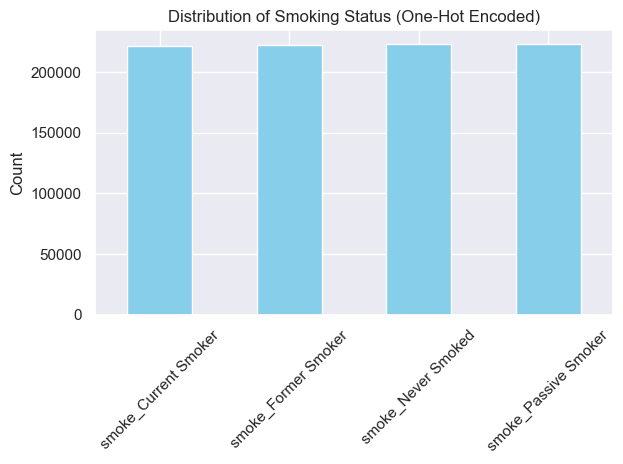

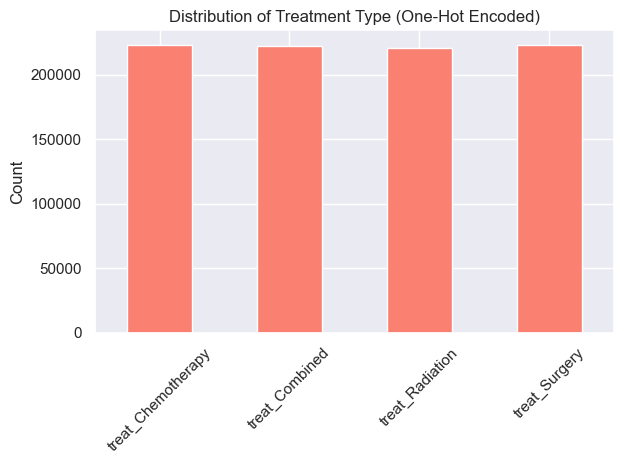

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot one-hot encoded smoking status
smoke_cols = [col for col in df_encoded.columns if col.startswith('smoke_')]
df_encoded[smoke_cols].sum().plot(kind='bar', color='skyblue')
plt.title("Distribution of Smoking Status (One-Hot Encoded)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot one-hot encoded treatment type
treat_cols = [col for col in df_encoded.columns if col.startswith('treat_')]
df_encoded[treat_cols].sum().plot(kind='bar', color='salmon')
plt.title("Distribution of Treatment Type (One-Hot Encoded)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

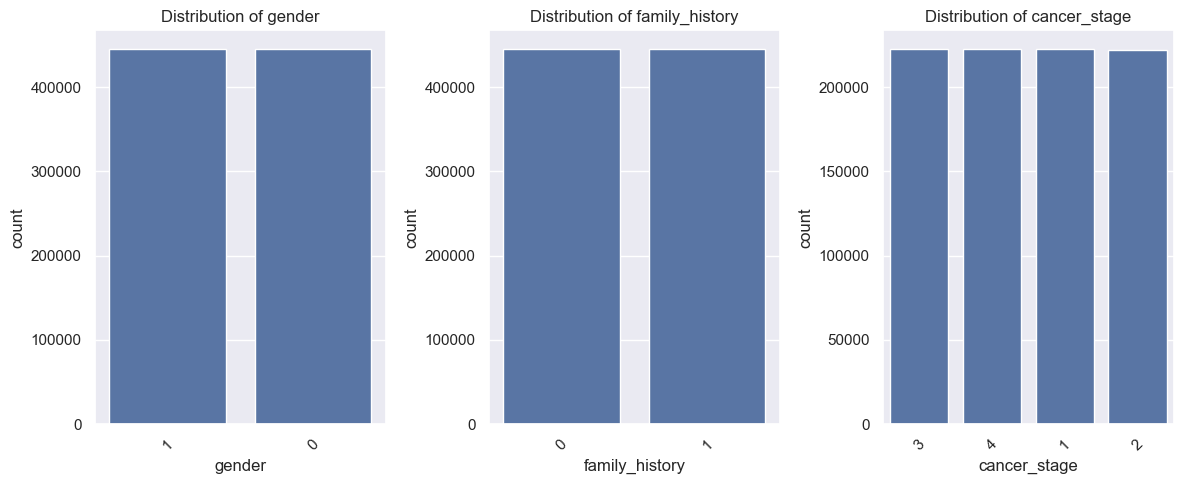

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Fix column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Define categorical columns (after cleaning)
categorical_cols = ['gender', 'family_history', 'cancer_stage']

# Create subplots (adjust to number of categorical columns)
fig, axes = plt.subplots(1, len(categorical_cols), figsize=(12, 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    try: # Use your dataframe (e.g., df instead of data)
        value_counts = df[col].value_counts()
        sns.countplot(data=df, x=col, order=value_counts.index, ax=axes[i])
        axes[i].set_title(f"Distribution of {col}")
        axes[i].tick_params(axis='x', rotation=45)
    except Exception as e:
        print(f"Error with column '{col}': {e}")

plt.tight_layout()
plt.show()

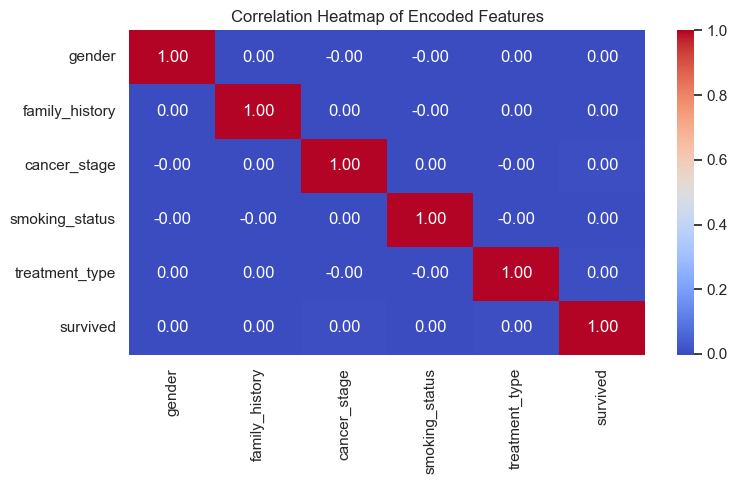

In [37]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

# Select the categorical columns to encode
cols_to_encode = ['gender', 'family_history', 'cancer_stage','smoking_status', 'treatment_type']

# Apply label encoding
encoder = OrdinalEncoder()
df[cols_to_encode] = encoder.fit_transform(df[cols_to_encode])

# Optionally include the target variable for correlation
selected_cols = cols_to_encode + ['survived']
encoded_df = df[selected_cols]

# Compute correlation matrix
corr_matrix = encoded_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Encoded Features")
plt.tight_layout()
plt.show()

In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv('Lung Cancer.csv')

# Create a copy for encoding
df_encoded = df.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical columns
for col in ['gender', 'family_history', 'cancer_stage','smoking_status','treatment_type']:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Drop unwanted columns
df_encoded.drop(['id', 'country', 'diagnosis_date', 'end_treatment_date'], axis=1, inplace=True)

# Save to a safe location (e.g., Documents folder)
df_encoded.to_csv("EncodingAIML.csv", index=False)
print("File saved as 'EncodingAIML.csv'")

File saved as 'EncodingAIML.csv'
